In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('madfhantr.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data = data.drop("Loan_ID",axis=1)

In [32]:

data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mode()[0])
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])

In [33]:
cat_columns = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]

for col in cat_columns :
    data[col] =data[col].fillna(data[col].mode()[0])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [34]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
le = LabelEncoder()

for col in cat_columns :
    data[col] = le.fit_transform(data[col])

In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


In [37]:
X = data.drop("Loan_Status",axis=1)
Y = data["Loan_Status"]

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [39]:
df = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state =42)
df.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

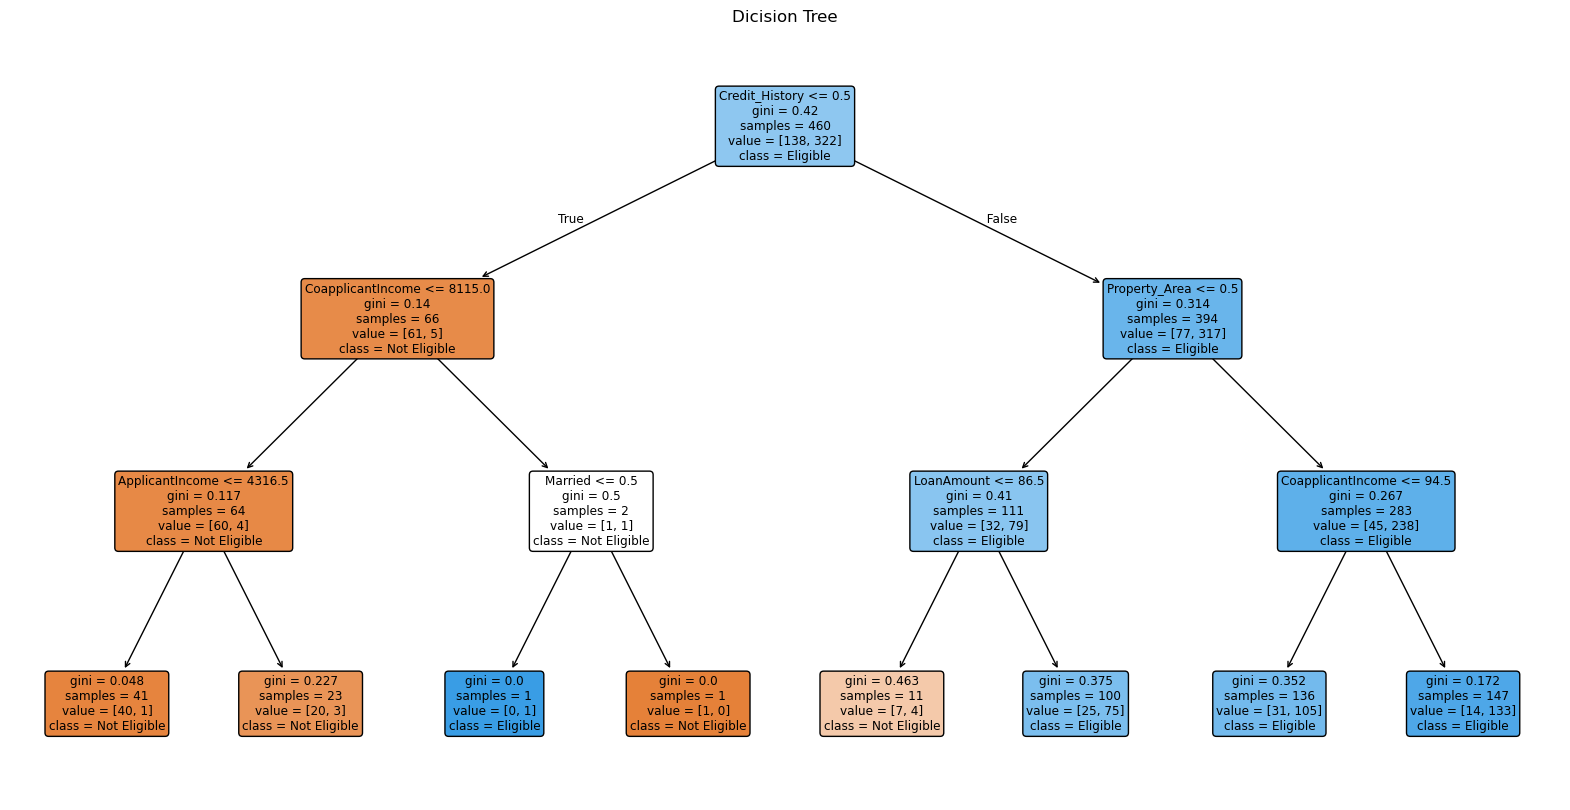

In [42]:
plt.figure(figsize=(20,10))
tree.plot_tree(df,feature_names = X.columns,class_names=["Not Eligible","Eligible"],filled = True,rounded = True)
plt.title("Dicision Tree")
plt.show()

In [43]:
y_pred = df.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Acc = accuracy_score(y_test,y_pred)
print(f'Acuuracy : {Acc*100:0.2f}')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Acuuracy : 75.97
              precision    recall  f1-score   support

           0       0.79      0.43      0.55        54
           1       0.75      0.94      0.84       100

    accuracy                           0.76       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.77      0.76      0.74       154

[[23 31]
 [ 6 94]]
